## 1.0 Introduction

In this notebook, we analyze the results of an agent-based model (ABM) developed to study the transmission dynamics of meningococcal meningitis in Nigeria. The primary objective of this analysis is to evaluate the impact of the Men5CV vaccine on disease spread and to identify optimal vaccination strategies. Multiple simulation scenarios were run, including a baseline scenario (no vaccination), a universal vaccination scenario with varying coverage levels, a targeted age group vaccination scenario, and a universal treatment scenario with different probabilities of treatment.

The baseline scenario represents the natural progression of the disease from 2000 to 2030 without any vaccination intervention, serving as a control to understand the current spread and impact of meningococcal meningitis. In the universal vaccination scenario, the entire population is vaccinated at coverage levels of 30%, 50%, 70%, and 90% to assess the reduction in infection rates and the potential to achieve herd immunity. The targeted age group vaccination scenario focuses on vaccinating specific age groups (e.g., children, teenagers, young adults) to determine the impact on disease transmission within those demographics. Finally, the universal treatment scenario explores the effects of treating the entire population with varying probabilities to evaluate the reduction in disease prevalence over time.

The goal of this analysis is to provide insights into the threshold levels of vaccination required to achieve herd immunity by 2030 and to determine the most cost-effective strategies for large-scale implementation of the Men5CV vaccine. We will utilize a simulated population of 5000 as a proxy before applying the findings to the actual population of Nigeria.

In [6]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 2.0 Baseline Scenario



This baseline data represents the natural progression of Menengitis without any vaccine intervention

In [3]:
df_baseline=pd.read_csv('Menengitis.csv')

In [4]:
df_baseline.head()

,gender,settlement,report_year,age,disease,health_status
0,Female,Urban,2011,59,Meningitis,Dead
1,Male,Urban,2015,49,Meningitis,Dead
2,Male,Urban,2011,48,Meningitis,Dead
3,Female,Urban,2009,30,Meningitis,Dead
4,Male,Rural,2013,24,Meningitis,Dead


In [23]:
df_baseline.sample(5)

,gender,settlement,report_year,age,disease,health_status
17463,Female,Rural,2018,71,Meningitis,Dead
15913,Male,Urban,2017,30,Meningitis,Dead
18116,Female,Urban,2014,39,Meningitis,Dead
15201,Male,Rural,2009,64,Meningitis,Dead
19807,Male,Rural,2015,33,Meningitis,Alive


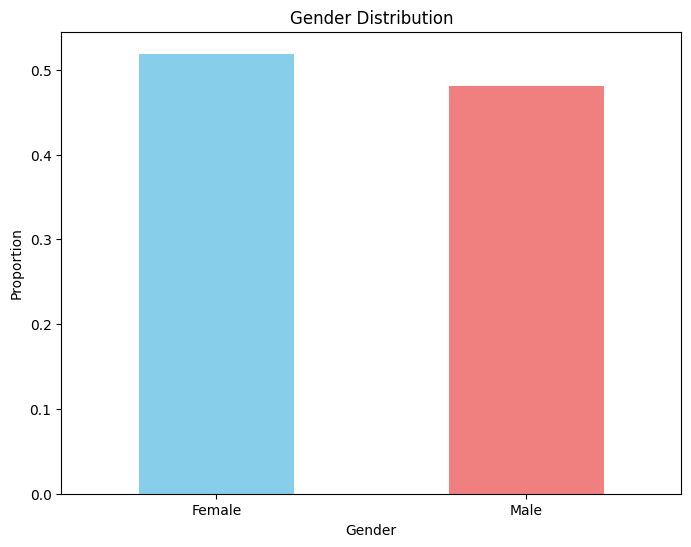

In [9]:
# Calculate gender distribution
gender_distribution = df_baseline['gender'].value_counts(normalize=True)

# Plot gender distribution
plt.figure(figsize=(8, 6))
gender_distribution.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.title('Gender Distribution')
plt.xticks(rotation=0)
plt.show()

In [10]:
df_baseline['gender'].value_counts(normalize=True)

gender
Female    0.518903
Male      0.481097
Name: proportion, dtype: float64

 relatively balanced population in terms of gender,which is beneficial for the study as it reduces the risk of gender bias in the results.
 

In [12]:
# Age distribution
df_baseline['age'].describe()

count    20050.000000
mean        45.655960
std         16.381148
min         18.000000
25%         32.000000
50%         45.000000
75%         60.000000
max         78.000000
Name: age, dtype: float64

The age distribution in the simulated population for meningitis in Nigeria skews towards middle-aged individuals, with a mean age of 45.66 years and a notable spread around this average, suggesting a diverse demographic profile

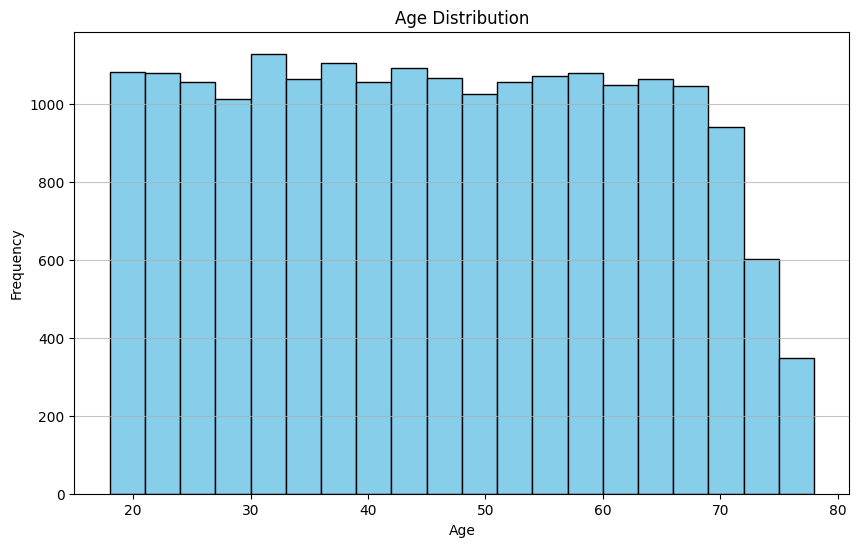

In [13]:
plt.figure(figsize=(10, 6))
df_baseline['age'].plot(kind='hist', bins=20, edgecolor='black', color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [15]:
df_baseline.columns

Index(['gender', 'settlement', 'report_year', 'age', 'disease',
       'health_status'],
      dtype='object')

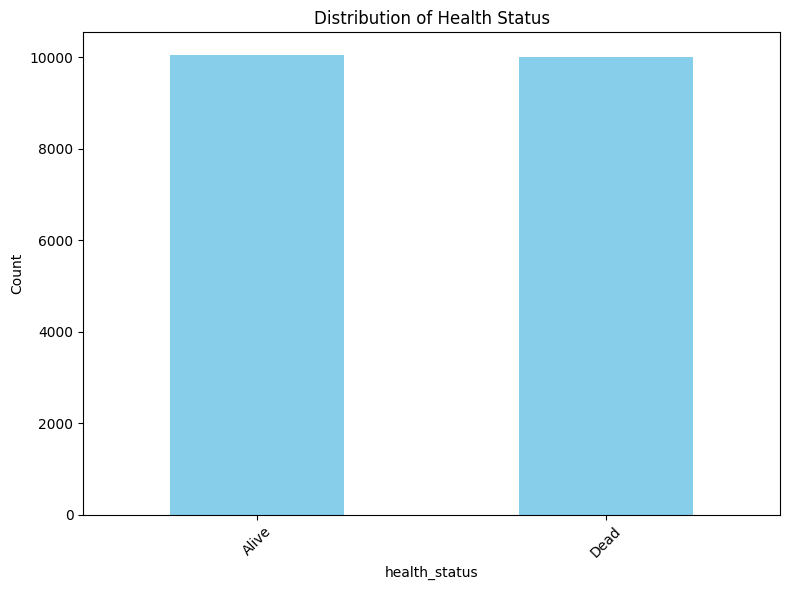

In [16]:
# Health Status
health_status_counts = df_baseline['health_status'].value_counts()
plt.figure(figsize=(8, 6))
health_status_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Health Status')
plt.xlabel('health_status')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

In [17]:
df_baseline['health_status'].value_counts(normalize=True)

health_status
Alive    0.500998
Dead     0.499002
Name: proportion, dtype: float64

The distribution of health statuses in the baseline data is nearly equal, with approximately 50.1% of individuals classified as alive and 49.9% as deceased

In [26]:
df_baseline['health_status'].unique()

array(['Dead', 'Alive'], dtype=object)

In [27]:
df_baseline['disease'].unique()

array(['Meningitis'], dtype=object)

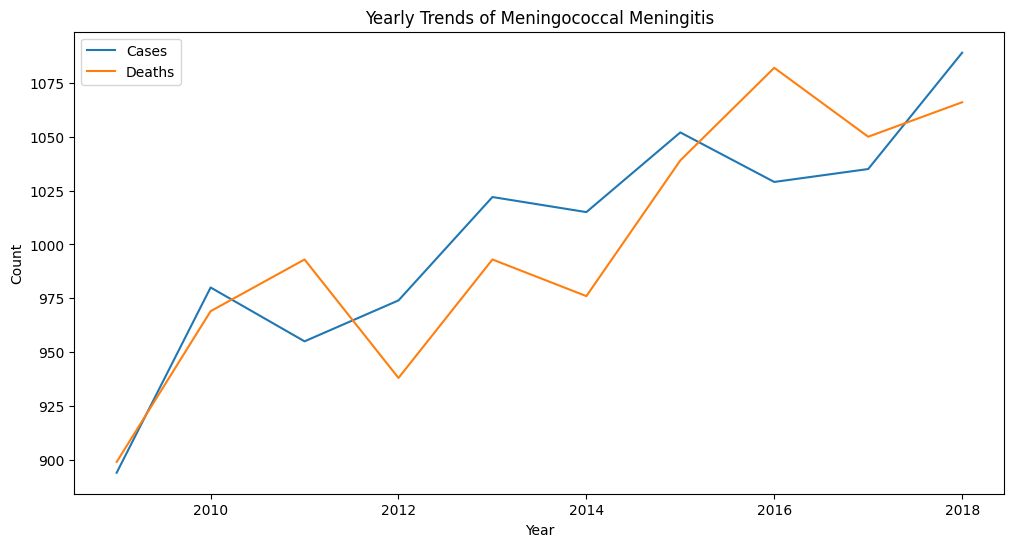

In [35]:
# Temporal Analysis (data and events across different time measurements)
yearly_cases = df_baseline.groupby(['report_year', 'health_status']).size().unstack(fill_value=0)['Alive']
yearly_deaths = df_baseline[df_baseline['health_status'] == 'Dead'].groupby('report_year').size()

# Plotting yearly trends
plt.figure(figsize=(12, 6))
plt.plot(yearly_cases, label='Cases')
plt.plot(yearly_deaths, label='Deaths')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Yearly Trends of Meningococcal Meningitis')
plt.legend()
plt.show()


In [36]:
df_baseline.head()

,gender,settlement,report_year,age,disease,health_status
0,Female,Urban,2011,59,Meningitis,Dead
1,Male,Urban,2015,49,Meningitis,Dead
2,Male,Urban,2011,48,Meningitis,Dead
3,Female,Urban,2009,30,Meningitis,Dead
4,Male,Rural,2013,24,Meningitis,Dead


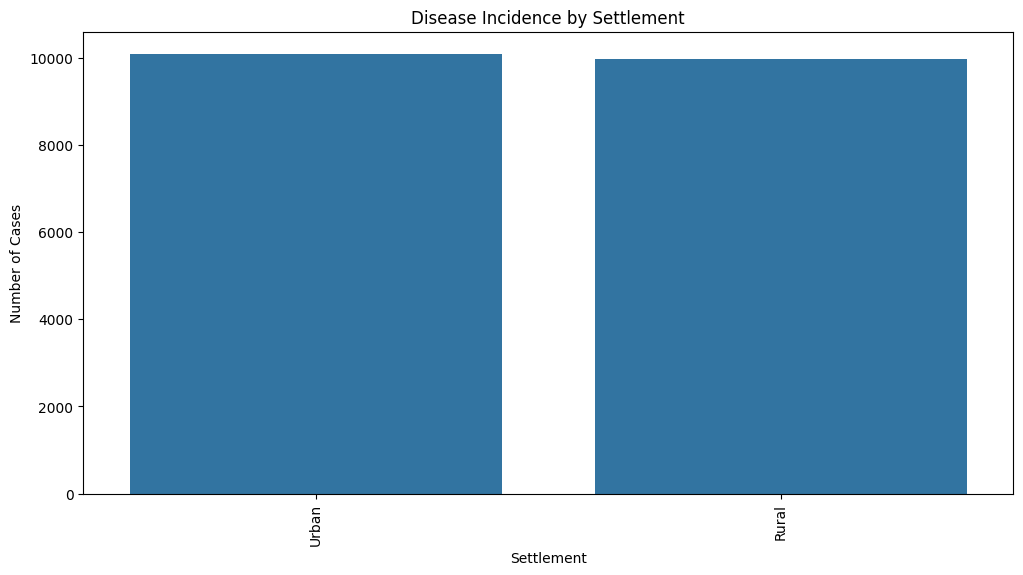

In [43]:
# 1.Settlement Analysis:distribution of cases across different settlements.
settlement_cases = df_baseline['settlement'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=settlement_cases.index, y=settlement_cases.values)
plt.xlabel('Settlement')
plt.ylabel('Number of Cases')
plt.title('Disease Incidence by Settlement')
plt.xticks(rotation=90)
plt.show()

In [42]:
settlement_cases

settlement
Urban    10091
Rural     9959
Name: count, dtype: int64

The distribution of disease cases is relatively balanced occurrence between urban and rural settlements, with urban areas accounting for 50.3% and rural areas for 49.7% of the total cases.

C:\Users\fmogire\AppData\Local\Temp\ipykernel_8572\2712366708.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_specific_incidence = df_baseline['disease'].groupby(age_groups).size()


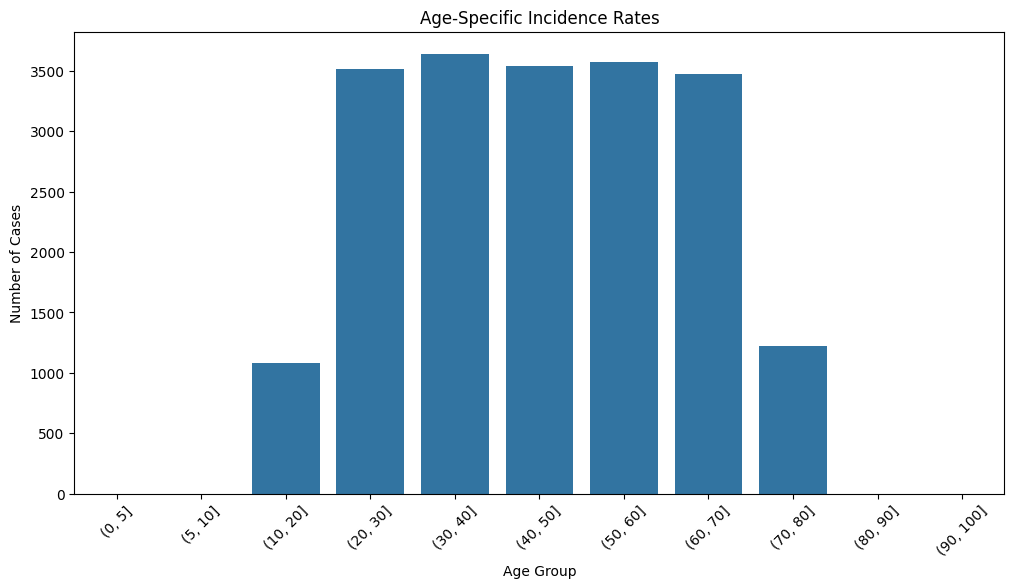

In [45]:
# Age-Specific Incidence Rates
age_groups = pd.cut(df_baseline['age'], bins=[0, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
age_specific_incidence = df_baseline['disease'].groupby(age_groups).size()
plt.figure(figsize=(12, 6))
sns.barplot(x=age_specific_incidence.index.astype(str), y=age_specific_incidence.values)
plt.xlabel('Age Group')
plt.ylabel('Number of Cases')
plt.title('Age-Specific Incidence Rates')
plt.xticks(rotation=45)
plt.show()

In [46]:
age_specific_incidence

age
(0, 5]          0
(5, 10]         0
(10, 20]     1084
(20, 30]     3514
(30, 40]     3641
(40, 50]     3543
(50, 60]     3573
(60, 70]     3470
(70, 80]     1225
(80, 90]        0
(90, 100]       0
Name: disease, dtype: int64

majority of disease cases are concentrated among individuals aged between 10 to 70 years old, with the highest incidence rates observed in the age groups spanning from 30 to 60 years old.

In [48]:
df_diseasedynamics=pd.read_csv('meningitis_dynamics.csv')

In [49]:
df_diseasedynamics.head ()

,n_alive,new_deaths,cum_deaths,meningitis.n_susceptible,meningitis.n_infected,meningitis.n_recovered,meningitis.n_exposed,meningitis.prevalence,meningitis.new_infections,meningitis.cum_infections,meningitis.rel_sus,meningitis.new_recoveries,meningitis.recovered,meningitis.exposed
0,10000.0,0.0,0.0,9914.0,5.0,0.0,81.0,0.0005,8.0,8.0,0.999996,0.0,0.0,81.0
1,10000.0,0.0,0.0,9853.0,31.0,2.0,114.0,0.0031,26.0,34.0,0.999991,0.0,0.0,114.0
2,10000.0,0.0,0.0,9760.0,65.0,14.0,161.0,0.0065,36.0,70.0,0.999985,0.0,0.0,161.0
3,10000.0,0.0,0.0,9636.0,99.0,58.0,207.0,0.0099,34.0,104.0,0.999976,0.0,0.0,207.0
4,10000.0,0.0,0.0,9453.0,150.0,96.0,301.0,0.0150,52.0,156.0,0.999964,0.0,0.0,301.0


In [50]:
df_diseasedynamics.columns

Index(['n_alive', 'new_deaths', 'cum_deaths', 'meningitis.n_susceptible',
       'meningitis.n_infected', 'meningitis.n_recovered',
       'meningitis.n_exposed', 'meningitis.prevalence',
       'meningitis.new_infections', 'meningitis.cum_infections',
       'meningitis.rel_sus', 'meningitis.new_recoveries',
       'meningitis.recovered', 'meningitis.exposed'],
      dtype='object')

In [52]:
df_diseasedynamics.describe()

,n_alive,new_deaths,cum_deaths,meningitis.n_susceptible,meningitis.n_infected,meningitis.n_recovered,meningitis.n_exposed,meningitis.prevalence,meningitis.new_infections,meningitis.cum_infections,meningitis.rel_sus,meningitis.new_recoveries,meningitis.recovered,meningitis.exposed
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.0,31.0,31.000000
mean,9947.741935,6.548387,45.709677,4572.838710,2108.645161,2200.870968,1065.387097,0.212623,185.387097,2623.677419,0.999304,0.0,0.0,1065.387097
std,62.835748,7.535864,56.900026,3280.265356,1475.287058,1529.445166,556.099612,0.149083,102.736776,2031.657507,0.000527,0.0,0.0,556.099612
min,9797.000000,0.000000,0.000000,1695.000000,5.000000,0.000000,81.000000,0.000500,8.000000,8.000000,0.998497,0.0,0.0,81.000000
25%,9915.000000,0.000000,0.000000,1887.000000,452.000000,521.000000,832.000000,0.045200,127.000000,471.500000,0.998848,0.0,0.0,832.000000
50%,9974.000000,3.000000,23.000000,2472.000000,2749.000000,3032.000000,1122.000000,0.275617,183.000000,2760.000000,0.999250,0.0,0.0,1122.000000
75%,10000.000000,12.500000,75.500000,8015.000000,3462.500000,3393.500000,1318.000000,0.349519,240.500000,4414.000000,0.999858,0.0,0.0,1318.000000
max,10000.000000,22.000000,188.000000,9914.000000,3820.000000,4245.000000,2128.000000,0.385430,389.000000,5747.000000,0.999996,0.0,0.0,2128.000000


In [53]:
# Incidence Rate Calculation
total_population = df_diseasedynamics['n_alive'].sum()
total_new_infections = df_diseasedynamics['meningitis.new_infections'].sum()
average_annual_incidence_rate = total_new_infections / total_population
print("Average Annual Incidence Rate of Meningitis:", average_annual_incidence_rate)

Average Annual Incidence Rate of Meningitis: 0.018636098320254233


In [54]:
# Recovery Rate Analysis
total_new_recoveries = df_diseasedynamics['meningitis.new_recoveries'].sum()
total_infected = df_diseasedynamics['meningitis.n_infected'].sum()
average_recovery_rate = total_new_recoveries / total_infected
print("Average Recovery Rate of Meningitis:", average_recovery_rate)

Average Recovery Rate of Meningitis: 0.0


## 3.0 Universal Treatment with different probabilities

This simulation scenario involves treating the entire population with different probabilities (e.g, 30%, 50%, 60%, 80%,100%). The aim is to track the impact of treatment on the population with time. 


In [55]:

df_univ_30=pd.read_csv('meningitis_dynamics_treatment_0.3.csv')

In [63]:
df_univ_30.head (10)

,n_alive,new_deaths,cum_deaths,meningitis.n_susceptible,meningitis.n_infected,meningitis.n_recovered,meningitis.n_exposed,meningitis.prevalence,meningitis.new_infections,meningitis.cum_infections,meningitis.rel_sus,meningitis.new_recoveries,meningitis.recovered,meningitis.exposed
0,2000.0,0.0,0.0,1978.0,2.0,0.0,20.0,0.0010,3.0,3.0,0.999993,0.0,0.0,20.0
1,2000.0,0.0,0.0,1967.0,6.0,1.0,26.0,0.0030,4.0,7.0,0.999989,0.0,0.0,26.0
2,2000.0,0.0,0.0,1948.0,19.0,2.0,31.0,0.0095,13.0,20.0,0.999984,0.0,0.0,31.0
3,2000.0,0.0,0.0,1918.0,24.0,9.0,49.0,0.0120,5.0,25.0,0.999974,0.0,0.0,49.0
4,2000.0,0.0,0.0,1880.0,35.0,19.0,66.0,0.0175,11.0,36.0,0.999959,0.0,0.0,66.0
5,2000.0,0.0,0.0,1830.0,47.0,34.0,89.0,0.0235,14.0,50.0,0.999940,0.0,0.0,89.0
6,2000.0,0.0,0.0,1774.0,64.0,57.0,105.0,0.0320,20.0,70.0,0.999915,0.0,0.0,105.0
7,2000.0,0.0,0.0,1707.0,87.0,84.0,122.0,0.0435,16.0,86.0,0.999887,0.0,0.0,122.0
8,2000.0,0.0,0.0,1625.0,113.0,114.0,148.0,0.0565,27.0,113.0,0.999853,0.0,0.0,148.0
9,2000.0,0.0,0.0,1517.0,137.0,149.0,197.0,0.0685,22.0,135.0,0.999812,0.0,0.0,197.0


In [64]:
df_univ_30.tail (10)

,n_alive,new_deaths,cum_deaths,meningitis.n_susceptible,meningitis.n_infected,meningitis.n_recovered,meningitis.n_exposed,meningitis.prevalence,meningitis.new_infections,meningitis.cum_infections,meningitis.rel_sus,meningitis.new_recoveries,meningitis.recovered,meningitis.exposed
91,1864.0,1.0,135.0,641.0,528.0,582.0,113.0,0.283262,33.0,3143.0,0.996040,0.0,0.0,113.0
92,1862.0,2.0,136.0,645.0,518.0,583.0,116.0,0.278195,37.0,3180.0,0.996000,0.0,0.0,116.0
93,1859.0,3.0,138.0,644.0,514.0,583.0,118.0,0.276493,33.0,3213.0,0.995962,0.0,0.0,118.0
94,1859.0,0.0,141.0,649.0,538.0,573.0,99.0,0.289403,35.0,3248.0,0.995918,0.0,0.0,99.0
95,1856.0,3.0,141.0,660.0,528.0,569.0,99.0,0.284483,28.0,3276.0,0.995883,0.0,0.0,99.0
96,1855.0,1.0,144.0,651.0,520.0,555.0,129.0,0.280323,30.0,3306.0,0.995848,0.0,0.0,129.0
97,1852.0,3.0,145.0,632.0,529.0,555.0,136.0,0.285637,32.0,3338.0,0.995797,0.0,0.0,136.0
98,1852.0,0.0,148.0,635.0,531.0,551.0,135.0,0.286717,39.0,3377.0,0.995749,0.0,0.0,135.0
99,1850.0,2.0,148.0,626.0,536.0,561.0,127.0,0.289730,39.0,3416.0,0.995702,0.0,0.0,127.0
100,1848.0,2.0,150.0,623.0,539.0,587.0,99.0,0.291667,39.0,3455.0,0.995669,0.0,0.0,99.0


In [57]:
df_univ_30.columns

Index(['n_alive', 'new_deaths', 'cum_deaths', 'meningitis.n_susceptible',
       'meningitis.n_infected', 'meningitis.n_recovered',
       'meningitis.n_exposed', 'meningitis.prevalence',
       'meningitis.new_infections', 'meningitis.cum_infections',
       'meningitis.rel_sus', 'meningitis.new_recoveries',
       'meningitis.recovered', 'meningitis.exposed'],
      dtype='object')

In [60]:
df_univ_50=pd.read_csv('meningitis_dynamics_treatment_0.5.csv')
df_univ_60=pd.read_csv('meningitis_dynamics_treatment_0.6.csv')
df_univ_80=pd.read_csv('meningitis_dynamics_treatment_0.8.csv')


In [66]:
prevalence_values

[0.2915178115749719,
 0.2916666666666667,
 0.2817589576547231,
 0.2800875273522976,
 0.2753544165757906]

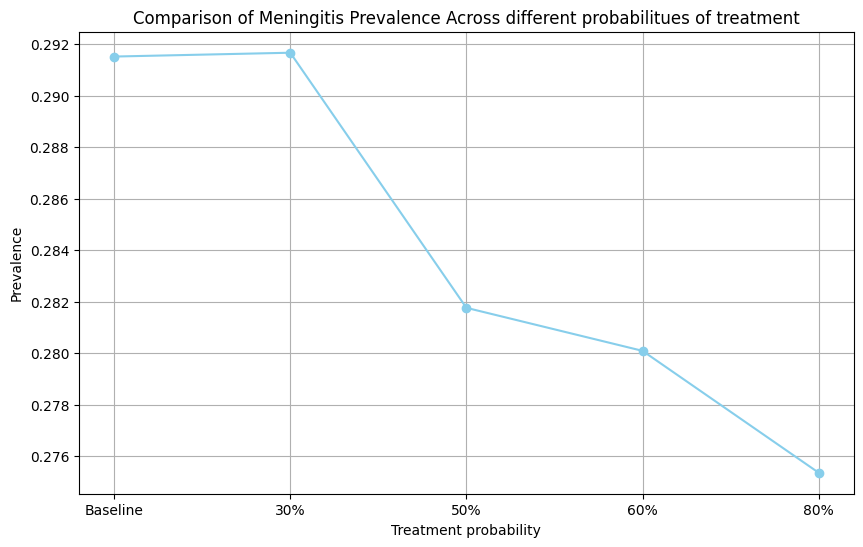

In [90]:
# Extract 'meningitis.prevalence' for each treatment probability
prevalence_baseline = df_diseasedynamics['meningitis.prevalence'].iloc[-1]  # Taking the last prevalence value
prevalence_30_percent = df_univ_30['meningitis.prevalence'].iloc[-1]
prevalence_50_percent = df_univ_50['meningitis.prevalence'].iloc[-1]
prevalence_60_percent = df_univ_60['meningitis.prevalence'].iloc[-1]
prevalence_80_percent = df_univ_80['meningitis.prevalence'].iloc[-1]

# Define Probabilities
Treatment_prob = ['Baseline', '30%', '50%', '60%', '80%']

# Define prevalence values
prevalence_values = [prevalence_baseline, prevalence_30_percent, prevalence_50_percent, 
                     prevalence_60_percent, prevalence_80_percent]

# Plot comparison of prevalence against treatment probability
plt.figure(figsize=(10, 6))
plt.plot(Treatment_prob, prevalence_values, marker='o', linestyle='-', color='skyblue')
plt.xlabel('Treatment probability')
plt.ylabel('Prevalence')
plt.title('Comparison of Meningitis Prevalence Across different probabilitues of treatment')
plt.grid(True)
plt.show()

Prevalence is going down at each treatment probability

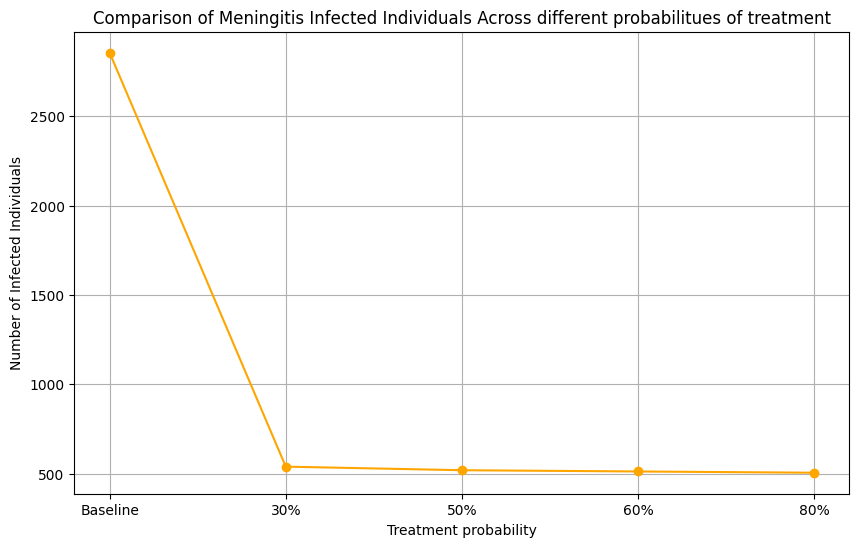

In [89]:
# Extract 'meningitis.n_infected' for Treatment probability
infected_baseline = df_diseasedynamics['meningitis.n_infected'].iloc[-1]  # Taking the last infected count
infected_30_percent = df_univ_30['meningitis.n_infected'].iloc[-1]
infected_50_percent = df_univ_50['meningitis.n_infected'].iloc[-1]
infected_60_percent = df_univ_60['meningitis.n_infected'].iloc[-1]
infected_80_percent = df_univ_80['meningitis.n_infected'].iloc[-1]

# Define coverage levels
Treatment_prob = ['Baseline', '30%', '50%', '60%', '80%']

# Define infected counts
infected_counts = [infected_baseline, infected_30_percent, infected_50_percent, 
                   infected_60_percent, infected_80_percent]

# Plot comparison of infected counts against coverage
plt.figure(figsize=(10, 6))
plt.plot(Treatment_prob, infected_counts, marker='o', linestyle='-', color='orange')
plt.xlabel('Treatment probability')
plt.ylabel('Number of Infected Individuals')
plt.title('Comparison of Meningitis Infected Individuals Across different probabilitues of treatment')
plt.grid(True)
plt.show()

infections going down significantly. 

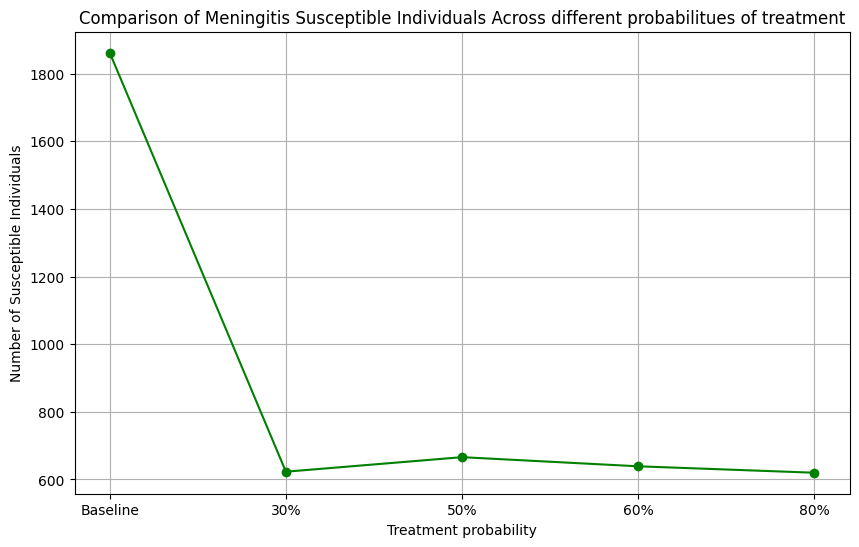

In [88]:
# Extract 'meningitis.n_susceptible' for each Treatment probability
susceptible_baseline = df_diseasedynamics['meningitis.n_susceptible'].iloc[-1]  # Taking the last susceptible count
susceptible_30_percent = df_univ_30['meningitis.n_susceptible'].iloc[-1]
susceptible_50_percent = df_univ_50['meningitis.n_susceptible'].iloc[-1]
susceptible_60_percent = df_univ_60['meningitis.n_susceptible'].iloc[-1]
susceptible_80_percent = df_univ_80['meningitis.n_susceptible'].iloc[-1]

# Define coverage levels
Treatment_prob = ['Baseline', '30%', '50%', '60%', '80%']

# Define susceptible counts
susceptible_counts = [susceptible_baseline, susceptible_30_percent, susceptible_50_percent, 
                      susceptible_60_percent, susceptible_80_percent]

# Plot comparison of susceptible counts against coverage
plt.figure(figsize=(10, 6))
plt.plot(Treatment_prob, susceptible_counts, marker='o', linestyle='-', color='green')
plt.xlabel('Treatment probability')
plt.ylabel('Number of Susceptible Individuals')
plt.title('Comparison of Meningitis Susceptible Individuals Across different probabilitues of treatment')
plt.grid(True)
plt.show()

Susceptibility going down

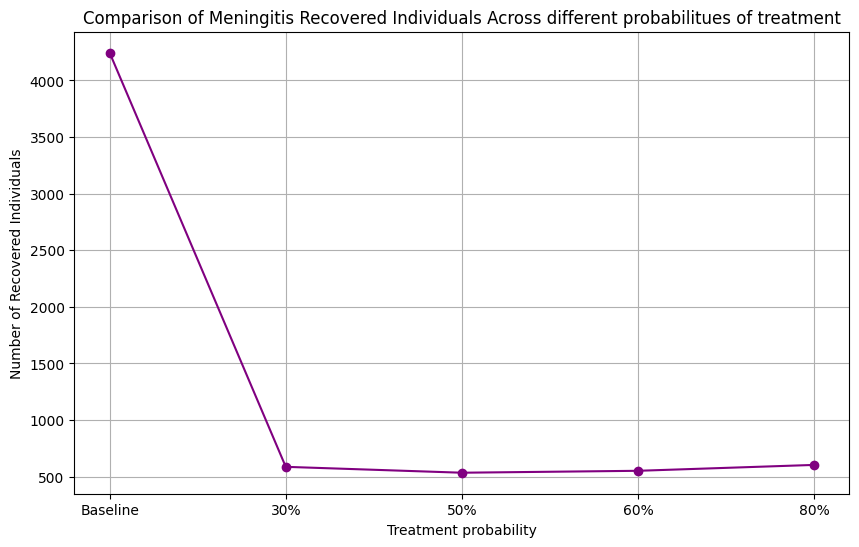

In [87]:
# Extract 'meningitis.recovered' for each treatment probability
recovered_baseline = df_diseasedynamics['meningitis.n_recovered'].iloc[-1]  # Taking the last recovered count
recovered_30_percent = df_univ_30['meningitis.n_recovered'].iloc[-1]
recovered_50_percent = df_univ_50['meningitis.n_recovered'].iloc[-1]
recovered_60_percent = df_univ_60['meningitis.n_recovered'].iloc[-1]
recovered_80_percent = df_univ_80['meningitis.n_recovered'].iloc[-1]

# Define coverage levels
Treatment_prob = ['Baseline', '30%', '50%', '60%', '80%']

# Define recovered counts
recovered_counts = [recovered_baseline, recovered_30_percent, recovered_50_percent, 
                    recovered_60_percent, recovered_80_percent]

# Plot comparison of recovered counts against coverage
plt.figure(figsize=(10, 6))
plt.plot(Treatment_prob, recovered_counts, marker='o', linestyle='-', color='purple')
plt.xlabel('Treatment probability')
plt.ylabel('Number of Recovered Individuals')
plt.title('Comparison of Meningitis Recovered Individuals Across different probabilitues of treatment')
plt.grid(True)
plt.show()

recoveries going down possibly because no. of infections is going down too

## 4.0 Different vaccination Coverage levels

This scenario involves vaccinating the entire population at different coverage levels (e.g., 30%, 50%, 60%, 80%). It aims to assess the impact of widespread vaccination on disease transmission and evaluate the reduction in infection rates and the potential to achieve herd immunity with varying degrees of population coverage.

In [81]:
df_vacc30=pd.read_csv('meningitis_dynamics_vaccine_0.3.csv')
df_vacc50=pd.read_csv('meningitis_dynamics_vaccine_0.5.csv')


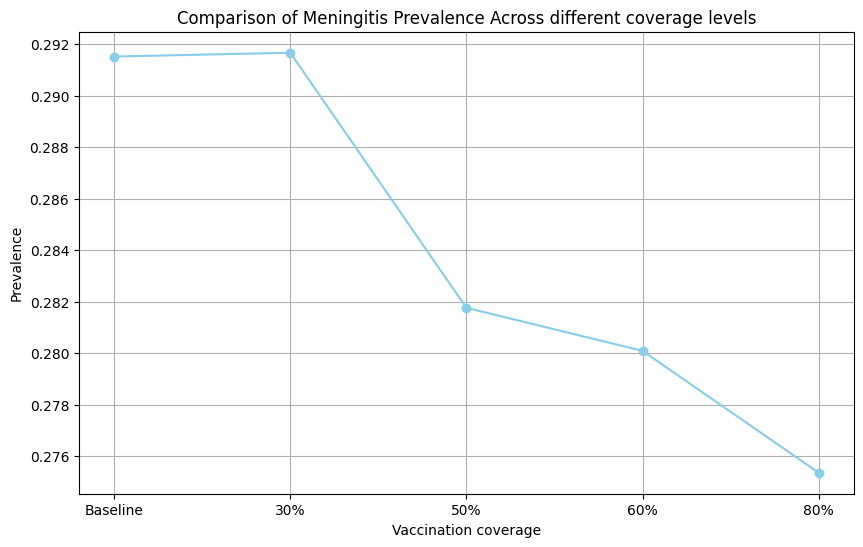

In [82]:
# Extract 'meningitis.prevalence' for each coverage level
vprevalence_baseline = df_diseasedynamics['meningitis.prevalence'].iloc[-1]  # Taking the last prevalence value
vprevalence_30_percent = df_vacc30['meningitis.prevalence'].iloc[-1]
vprevalence_50_percent = df_vacc50['meningitis.prevalence'].iloc[-1]

# Define coverage levels
coverage_levels = ['Baseline', '30%', '50%', '60%', '80%']

# Define prevalence values
prevalence_values = [prevalence_baseline, prevalence_30_percent, prevalence_50_percent, 
                     prevalence_60_percent, prevalence_80_percent]

# Plot comparison of prevalence against coverage
plt.figure(figsize=(10, 6))
plt.plot(coverage_levels, prevalence_values, marker='o', linestyle='-', color='skyblue')
plt.xlabel('Vaccination coverage')
plt.ylabel('Prevalence')
plt.title('Comparison of Meningitis Prevalence Across different coverage levels')
plt.grid(True)
plt.show()

Prevalence goes doen at every coverage level

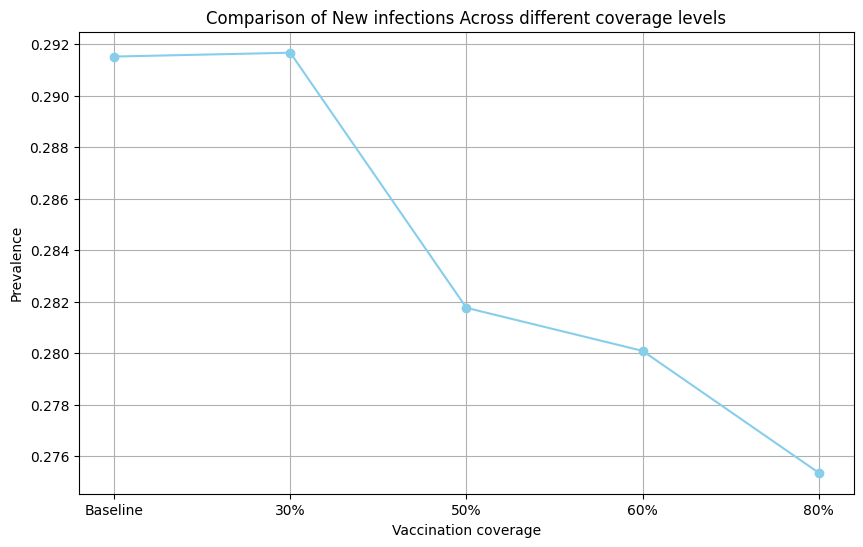

In [83]:
# Extract 'meningitis.n_infected' for each coverage level
vprevalence_baseline = df_diseasedynamics['meningitis.n_infected'].iloc[-1]  # Taking the last prevalence value
vprevalence_30_percent = df_vacc30['meningitis.n_infected'].iloc[-1]
vprevalence_50_percent = df_vacc50['meningitis.n_infected'].iloc[-1]

# Define coverage levels
coverage_levels = ['Baseline', '30%', '50%', '60%', '80%']

# Define prevalence values
prevalence_values = [prevalence_baseline, prevalence_30_percent, prevalence_50_percent, 
                     prevalence_60_percent, prevalence_80_percent]

# Plot comparison of prevalence against coverage
plt.figure(figsize=(10, 6))
plt.plot(coverage_levels, prevalence_values, marker='o', linestyle='-', color='skyblue')
plt.xlabel('Vaccination coverage')
plt.ylabel('Prevalence')
plt.title('Comparison of New infections Across different coverage levels')
plt.grid(True)
plt.show()

New infections go down at every coverage level